Code can just be ran directly as they are all analysis code and only edits that are required are ticker symbol which by default will be set to AAPL but can exchange with and symbol. Can also change the time interval of the dataset but may have more of an impact than intended so did not really do that in order to have a good representation of each model's accuracy in predicting stock prices.

Some of the stock data Yahoo finance can provide below:

*   Open price and date
*   Close price and date
*   Previous closing price
*   Market cap
*   Share volume
*   Annualized dividend
*   Dividend payment date
*   Ex-dividend date
*   Beta
*   Best bid/ask
*   Earnings per share(EPS)
*   P/E Ratio
*   Forward P/E [1y]
*   52 week high/low
*   1-year targer
*   Current yield

Features that will have the most impact on prediction will be the measurable data in terms of price of a certain stock. If we add indirect features such as dividend payment date it would skew data as sit is not relative with the stock price. With that in mind I will be comparing all the different models using dataset with features:
Date,
Low,
High,
Close,
Open,
Volume (shares traded indicating market strength),
Adjusted Close (Amendment on 'Close' price to account for any corporate costs post close e.g. paying dividends)
etc. More details are discussed in the project report.





In [ ]:
# Install yahoo finance packages
!pip install yfinance
!pip install yahoofinancials
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for yahoofinancials: filename=yahoofinancials-1.16-py3-none-any.whl size=28710 sha256=5b138744a37c977ac0c2f073cf42b4912832e30c8b737dd30fd0409e6dbdcb95
  Stored in directory: /root/.cache/pip/wheels/fd/fe/c4/4b17989f30abf08d147a72cd1097ae0f6b1a1dd070f3abf726
Successfully built yahoofinancials
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.7/214.7 kB 19.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.1 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8791 sha256=ac8c0e94754b9f96dcd5489af25e99a652133175698e886fe52f628cd1135c5b
  Stored in directory: /root/.cache/pip/wheels/e7/f3/2

Get the dataset for the interested tickers:
AAPL - Apple

BTC - Bitcoin

AMZN - Amazon

AMD - Advanced Micro Devices

INTC - Intel Corporation

NVDA - NVIDIA

TAN - Invesco Solar ETF

CNRG - SPDR S&P Kensho Clean Power ETF


[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2018-07-30  47.974998  48.049999  47.267502  47.477501  45.373066   84118000
2018-07-31  47.575001  48.035000  47.334999  47.572498  45.463856  157492000
2018-08-01  49.782501  50.439999  49.327499  50.375000  48.142147  271742800
2018-08-02  50.145000  52.095001  50.087502  51.847500  49.549370  249616000
2018-08-03  51.757500  52.185001  51.369999  51.997501  49.692734  133789600
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-07-24  193.410004  194.910004  192.250000  192.750000  192.750000   
2023-07-25  193.330002  194.440002  192.919998  193.619995  193.619995   
2023-07-26  193.669998  195.639999  193.320007  194.500000  194.500000   
2023-07-27  196.020004

<Axes: title={'center': 'AAPL stock price in USD'}, xlabel='Date'>

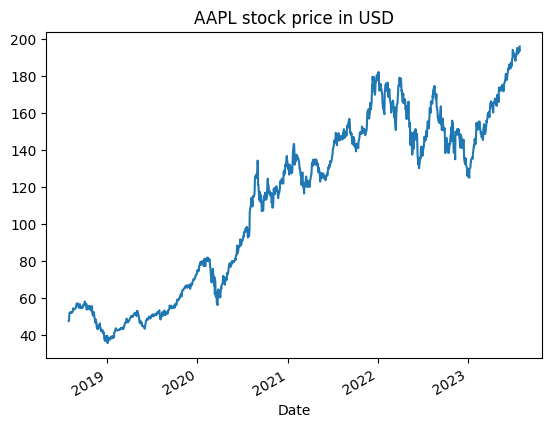

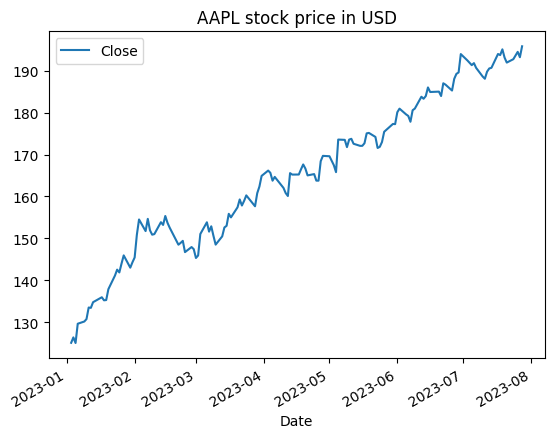

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf

# Replace the stock symbol for respective ticker interested in comparing
stock_symbol = 'AAPL' # AAPL AMZN NVDA CNRG TAN BTC AMD INTC
df = yf.download(tickers=stock_symbol, period = '5y', interval = '1d') # Get data for the last 5 years w/ interval set to 1 day for all cases except LSTM
type(df)
print(df.head())
print(df.tail())
print(df.shape)
print('')

# Train the data and create test
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

data_training_array=scaler.fit_transform(data_training)
data_training_array

data_training_array.shape

X_train=[]
y_train=[]

for i in range(100, data_training_array.shape[0]):
    X_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
X_train, y_train=np.array(X_train), np.array(y_train)

X_train = X_train.reshape(X_train.shape[0], -1)

data_testing_array=scaler.fit_transform(data_testing)
data_testing_array

data_testing_array.shape

X_test=[]
y_test=[]

for i in range(100, data_testing_array.shape[0]):
    X_test.append(data_testing_array[i-100:i])
    y_test.append(data_testing_array[i,0])
X_test, y_test=np.array(X_test), np.array(y_test)

X_test = X_test.reshape(X_test.shape[0], -1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

df['Close'].plot(title= stock_symbol + " stock price in USD")

import pandas as pd
import yfinance as yf
import datetime

# Replace the stock symbol for respective ticker interested in comparing
stock_symbol = 'AAPL'  # AAPL AMZN NVDA CNRG TAN BTC AMD INTC
df = yf.download(tickers=stock_symbol, period='ytd', interval='1d')  # Get Year-to-Date data with daily interval
df.reset_index(inplace=True)

# Plotting YTD data
df.plot(x='Date', y='Close', title=stock_symbol + " stock price in USD")



# **Linear Regression**

In [ ]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Model Evaluation for all following models used
from sklearn.metrics import r2_score, mean_absolute_error

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

y_pred_train = lin_model.predict(X_train)
rmse_train = rmse(y_pred_train, y_train)
r2_train = r2_score(y_train, y_pred_train)
print("Training RMSE = " + str(rmse_train))
print("Training R2 = " + str(r2_train))
print("Mean Absolute Error = " + str(mean_absolute_error(y_train, y_pred_train,)))

print('')

# Predict Test Set
y_pred_test = lin_model.predict(X_test)
rmse_test = rmse(y_pred_test, y_test)
r2_test = r2_score(y_test, y_pred_test)
print("RMSE = " + str(rmse_test))
print("R2 = " + str(r2_test))
print("Mean Absolute Error = " + str(mean_absolute_error(y_test, y_pred_test)))

Training RMSE = 0.012596047374816758
Training R2 = 0.9979600448976844
Mean Absolute Error = 0.008969862531076593

RMSE = 0.042761604177766886
R2 = 0.9686564404168775
Mean Absolute Error = 0.03314569693566787


# **Decision Tree Regression**

In [ ]:
#Decision Tree Regression
import numpy as np
from sklearn.tree import DecisionTreeRegressor

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

# Predict Max Depth of 2
y_1 = regr_1.predict(X_train)
rmse_train = rmse(y_1, y_train)
r2_train = r2_score(y_train, y_1)
print("Train RMSE = " + str(rmse_train))
print("Train R2 = " + str(r2_train))
print("Mean Absolute Error = " + str(mean_absolute_error(y_train, y_1)))

print('')

# Predict Max Depth of 5
y_2 = regr_2.predict(X_test)
rmse_test = rmse(y_2, y_test)
r2_test = r2_score(y_test, y_2)
print("Test RMSE = " + str(rmse_test))
print("Test R2 = " + str(r2_test))
print("Mean Absolute Error = " + str(mean_absolute_error(y_test, y_2)))

Train RMSE = 0.06006561274485474
Train R2 = 0.9536121908326408
Mean Absolute Error = 0.0483063239833239

Test RMSE = 0.11272166961036173
Test R2 = 0.7822013599574881
Mean Absolute Error = 0.08168169246900354


# **KNeighborsRegressor**

In [ ]:
# KNeighborsRegressor
import numpy as np
from sklearn.neighbors import KNeighborsRegressor

# Fit regression model
neigh_1 = KNeighborsRegressor(n_neighbors=2)
neigh_2 = KNeighborsRegressor(n_neighbors=5)
neigh_1.fit(X_train, y_train)
neigh_2.fit(X_train, y_train)

# Predict 2NN
y_1 = neigh_1.predict(X_train)
rmse_train= rmse(y_1, y_train)
r2_train = r2_score(y_train, y_1)
print("Train RMSE = " + str(rmse_train))
print("Train R2 = " + str(r2_train))
print("Mean Absolute Error = " + str(mean_absolute_error(y_train, y_1)))

# Predict 5NN
y_2 = neigh_2.predict(X_train)
rmse_train = rmse(y_2, y_train)
r2_train = r2_score(y_train, y_2)
print("Train RMSE = " + str(rmse_train))
print("Train R2 = " + str(r2_train))
print("Mean Absolute Error = " + str(mean_absolute_error(y_train, y_2)))

print('')

# Predict 2NN
y_1 = neigh_1.predict(X_test)
rmse_test= rmse(y_1, y_test)
r2_test = r2_score(y_test, y_1)
print("Test RMSE = " + str(rmse_test))
print("Test R2 = " + str(r2_test))
print("Mean Absolute Error = " + str(mean_absolute_error(y_test, y_1)))

# Predict 5NN
y_2 = neigh_2.predict(X_test)
rmse_test = rmse(y_2, y_test)
r2_test = r2_score(y_test, y_2)
print("Test RMSE = " + str(rmse_test))
print("Test R2 = " + str(r2_test))
print("Mean Absolute Error = " + str(mean_absolute_error(y_test, y_2)))

Train RMSE = 0.007856025901050199
Train R2 = 0.9992064800469184
Mean Absolute Error = 0.005678413166893087
Train RMSE = 0.008877452570020641
Train R2 = 0.9989867216590409
Mean Absolute Error = 0.00629240321565769

Test RMSE = 0.19771287691700462
Test R2 = 0.32994531344632594
Mean Absolute Error = 0.16610599766946474
Test RMSE = 0.1949346309173801
Test R2 = 0.34864411966732956
Mean Absolute Error = 0.16218703202449722


# **Gradient Boosted Tree Regression**

In [ ]:
# Gradient Boosted Tree Regression
from sklearn.ensemble import GradientBoostingRegressor

# Fit regression model
gb_1 = GradientBoostingRegressor(random_state=0)
gb_1.fit(X_train, y_train)

# Predict
y_1 = gb_1.predict(X_train)
rmse_train = rmse(y_1, y_train)
r2_train = r2_score(y_train, y_1)
print("Training RMSE = " + str(rmse_train))
print("Training R2 = " + str(r2_train))
print("Mean Absolute Error = " + str(mean_absolute_error(y_train, y_1)))


print('')

# Predict
y_1 = gb_1.predict(X_test)
rmse_test = rmse(y_1, y_test)
r2_test = r2_score(y_test, y_1)
print("Test RMSE = " + str(rmse_test))
print("Test R2 = " + str(r2_test))
print("Mean Absolute Error = " + str(mean_absolute_error(y_test, y_1)))



Training RMSE = 0.006920388358651001
Training R2 = 0.9993842378752968
Mean Absolute Error = 0.005144545084031232

Test RMSE = 0.07749170215095096
Test R2 = 0.8970679223269634
Mean Absolute Error = 0.06062849046840539


# **Neural Network - MLP Regressor**

In [ ]:
# Neural Networks from Class
from sklearn.neural_network import MLPRegressor

# Fit regression model
regr1 = MLPRegressor(random_state=23, max_iter=1000).fit(X_train, y_train)

# Predict
y_1 = regr1.predict(X_train)
rmse_train = rmse(y_1, y_train)
r2_train = r2_score(y_train, y_1)
print("Training RMSE = " + str(rmse_train))
print("Training R2 = " + str(r2_train))
print("Mean Absolute Error = " + str(mean_absolute_error(y_train, y_1)))

print('')

# Predict
y_1 = regr1.predict(X_test)
rmse_test = rmse(y_1, y_test)
r2_test = r2_score(y_test, y_1)
print("Test RMSE = " + str(rmse_test))
print("Test R2 = " + str(r2_test))
print("Mean Absolute Error = " + str(mean_absolute_error(y_test, y_1)))

def mean_absolute_error(y_true, y_pred):
        mae = np.mean(np.abs(y_true - y_pred))
        return mae

Training RMSE = 0.028754220192676573
Training R2 = 0.9893694624327255
Mean Absolute Error = 0.021797746896138

Test RMSE = 0.09502441278919131
Test R2 = 0.8452214666556015
Mean Absolute Error = 0.0739280981539603


# **LSTM (Long short-term memory)**

In [ ]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=5000)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

name = 'AAPL' # AAPL AMZN NVDA CNRG TAN BTC AMD INTC
data = yf.download(name,
                      start=start_date,
                      end=end_date,
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close",
             "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3439,2023-07-24,193.410004,194.910004,192.250000,192.750000,192.750000,45377800
3440,2023-07-25,193.330002,194.440002,192.919998,193.619995,193.619995,37283200
3441,2023-07-26,193.669998,195.639999,193.320007,194.500000,194.500000,47471900
3442,2023-07-27,196.020004,197.199997,192.550003,193.220001,193.220001,47460200
3443,2023-07-28,194.669998,196.619995,194.149399,195.830002,195.830002,46977437


In [ ]:
# Plot a candlestick chart gives a clear picture of the increase and decrease in stock prices
import plotly.graph_objects as go
figure = go.Figure(data=[go.Candlestick(x=data["Date"],
                                        open=data["Open"],
                                        high=data["High"],
                                        low=data["Low"],
                                        close=data["Close"])])
figure.update_layout(title = name + " Stock Price",
                     xaxis_rangeslider_visible=False)
figure.show()

In [ ]:
# We are interested in predicting the closing price for the following day
# Train the data as such
x = data[["Open", "High", "Low", "Volume"]]
y = data["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# init lstm neural network
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (xtrain.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 128)            66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the neural network model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(xtrain, ytrain, batch_size=1, epochs=30)

Epoch 1/30
2755/2755 [==============================] - 18s 4ms/step - loss: 303.2941
Epoch 2/30
2755/2755 [==============================] - 9s 3ms/step - loss: 12.5394
Epoch 3/30
2755/2755 [==============================] - 10s 4ms/step - loss: 11.7398
Epoch 4/30
2755/2755 [==============================] - 10s 4ms/step - loss: 14.4736
Epoch 5/30
2755/2755 [==============================] - 10s 4ms/step - loss: 8.1223
Epoch 6/30
2755/2755 [==============================] - 9s 3ms/step - loss: 7.2938
Epoch 7/30
2755/2755 [==============================] - 11s 4ms/step - loss: 9.3774
Epoch 8/30
2755/2755 [==============================] - 10s 4ms/step - loss: 5.8204
Epoch 9/30
2755/2755 [==============================] - 10s 3ms/step - loss: 9.8522
Epoch 10/30
2755/2755 [==============================] - 9s 3ms/step - loss: 8.8295
Epoch 11/30
2755/2755 [==============================] - 9s 3ms/step - loss: 6.6455
Epoch 12/30
2755/2755 [==============================] - 10s 4ms/step - l

In [ ]:
# Test predictions using features
import numpy as np
# Features = [Open, High, Low, Adj Close, Volume]
# Predict
y_1 = model.predict(xtrain)
rmse_train = rmse(y_1, ytrain)
r2_train = r2_score(ytrain, y_1)
print("Training RMSE = " + str(rmse_train))
print("Training R2 = " + str(r2_train))
print("Mean Absolute Error = " + str(mean_absolute_error(ytrain, y_1)))

print('')

# Predict
y_1 = model.predict(xtest)
rmse_test = rmse(y_1, ytest)
r2_test = r2_score(ytest, y_1)
print("Test RMSE = " + str(rmse_test))
print("Test R2 = " + str(r2_test))
print("Mean Absolute Error = " + str(mean_absolute_error(ytest, y_1)))

import numpy as np
#features = [Open, High, Low, Adj Close, Volume]
features = np.array([[141.399994, 148.720001, 140.550003, 148.029999, 111224400]])
model.predict(features)

87/87 [==============================] - 1s 2ms/step
Training RMSE = 2.8287115060719366
Training R2 = 0.9970612521145301
Mean Absolute Error = 1.8244799911651335

22/22 [==============================] - 0s 3ms/step
Test RMSE = 2.624858544124394
Test R2 = 0.997225134862316
Mean Absolute Error = 1.6240359376926727
1/1 [==============================] - 1s 529ms/step


array([[137.4654]], dtype=float32)

In [ ]:
!pip install PySpark
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for PySpark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285397 sha256=208958d0237b792e8322ca8c6afa477eb68e80f57ae5370dac766cf2764b1952
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built PySpark


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from pyspark import SparkContext
import numpy as np
import pandas as pd
import yfinance as yf

class SVMRegression:

    def __init__(self, learning_rate=1e-5, lambda_param=1e-5, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y, sc=None):
        # Create a SparkContext
        if sc is None:
          sc = SparkContext(appName="SVMRegressionMapReduce")

        # Broadcast the variables to all nodes for read-only access
        lr_broadcast = sc.broadcast(self.lr)
        lambda_param_broadcast = sc.broadcast(self.lambda_param)

        n_samples, n_features = X.shape

        # Initialize weights
        self.w = np.zeros(n_features)
        self.b = 0

        # Convert X and y to RDDs
        X_rdd = sc.parallelize(X.tolist())
        y_rdd = sc.parallelize(y.tolist())

        for _ in range(self.n_iters):
          # Perform the distributed gradient updates using MapReduce
          updates = X_rdd.zip(y_rdd).map(lambda x_y: self._gradient_update(x_y, lr_broadcast.value, lambda_param_broadcast.value))
          # Aggregate the updates using reduce
          total_update = updates.reduce(lambda acc, update: (acc[0] + update[0], acc[1] + update[1]))
          # Apply the aggregated updates to the weights and bias
          self.w -= total_update[0]
          self.b -= total_update[1]

        # Stop the SparkContext
        sc.stop()

    def _gradient_update(self, x_y, lr, lambda_param):
        x_i = np.array(x_y[0])
        y_i = x_y[1]
        prediction = np.dot(x_i, self.w) - self.b
        error = y_i - prediction

        # Calculate the gradient update for weights and bias
        w_update = lr * (2 * lambda_param * self.w - np.dot(x_i, error))
        b_update = lr * (-2 * lambda_param * self.b + error)

        return (w_update, b_update)

    def predict(self, X):
        return np.dot(X, self.w) - self.b

def load_dataset():
  # Replace the stock symbol for respective ticker interested in comparing
  stock_symbol = 'AAPL' # AAPL AMZN NVDA CNRG TAN BTC AMD INTC
  df = yf.download(tickers=stock_symbol, period = '5y', interval = '1d') # Get data for the last 5 years w/ interval set to 1 day for all cases
  type(df)

  # Train/Test
  data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
  data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

  scaler=MinMaxScaler(feature_range=(0,1))

  data_training_array=scaler.fit_transform(data_training)
  data_training_array
  data_training_array.shape

  X_train=[]
  y_train=[]

  for i in range(100, data_training_array.shape[0]):
    X_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])
  X_train, y_train=np.array(X_train), np.array(y_train)

  X_train = X_train.reshape(X_train.shape[0], -1)

  data_testing_array=scaler.fit_transform(data_testing)
  data_testing_array

  data_testing_array.shape

  X_test=[]
  y_test=[]

  for i in range(100, data_testing_array.shape[0]):
    X_test.append(data_testing_array[i-100:i])
    y_test.append(data_testing_array[i, 0])
  X_test, y_test=np.array(X_test), np.array(y_test)

  X_test = X_test.reshape(X_test.shape[0], -1)

  return X_train, y_train, X_test, y_test

def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, r2

X_train, y_train, X_test, y_test = load_dataset()
clf = SVMRegression()

# Fit the model and make predictions for train and test datasets
clf.fit(X_train, y_train)
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

# Calculate metrics for train dataset
train_mse, train_mae, train_r2 = calculate_metrics(y_train, train_predictions)

# Calculate metrics for test dataset
test_mse, test_mae, test_r2 = calculate_metrics(y_test, test_predictions)

print("Train RMSE:", np.sqrt(train_mse))
print("Train MAE:", train_mae)
print("Train R2 score:", train_r2)

print("Test RMSE:", np.sqrt(test_mse))
print("Test MAE:", test_mae)
print("Test R2 score:", test_r2)

[*********************100%***********************]  1 of 1 completed
Train RMSE: 0.044160823945957356
Train MAE: 0.032627407412878597
Train R2 score: 0.974925841091261
Test RMSE: 0.13330715077679733
Test MAE: 0.11719950266052787
Test R2 score: 0.6953878441076372
